Name : Maheru Tabassum Ohana,
ID : 2125051015, Section : 8A, Batch : 50,
Department : CSE

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Step 1: Read grayscale image from URL
url = 'https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png'  # you can change this
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
gray_img = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

In [17]:
# Step 2: Define custom filter and normalize it
kernel = np.array([
    [1, 1, 1],
    [1, 2, 1],
    [1, 1, 1]
], dtype=np.float32)
kernel = kernel / kernel.sum()  # Normalize



In [18]:
# Step 3: Apply filter using cv2.filter2D
filtered_cv2 = cv2.filter2D(gray_img, -1, kernel)


In [19]:
# Step 4: Apply filter manually using convolution
# Pad the image
padded_img = cv2.copyMakeBorder(gray_img, 1, 1, 1, 1, cv2.BORDER_REFLECT)
manual_filtered = np.zeros_like(gray_img)

# Convolve manually
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        region = padded_img[i:i+3, j:j+3]
        manual_filtered[i, j] = np.sum(region * kernel)

manual_filtered = np.clip(manual_filtered, 0, 255).astype(np.uint8)



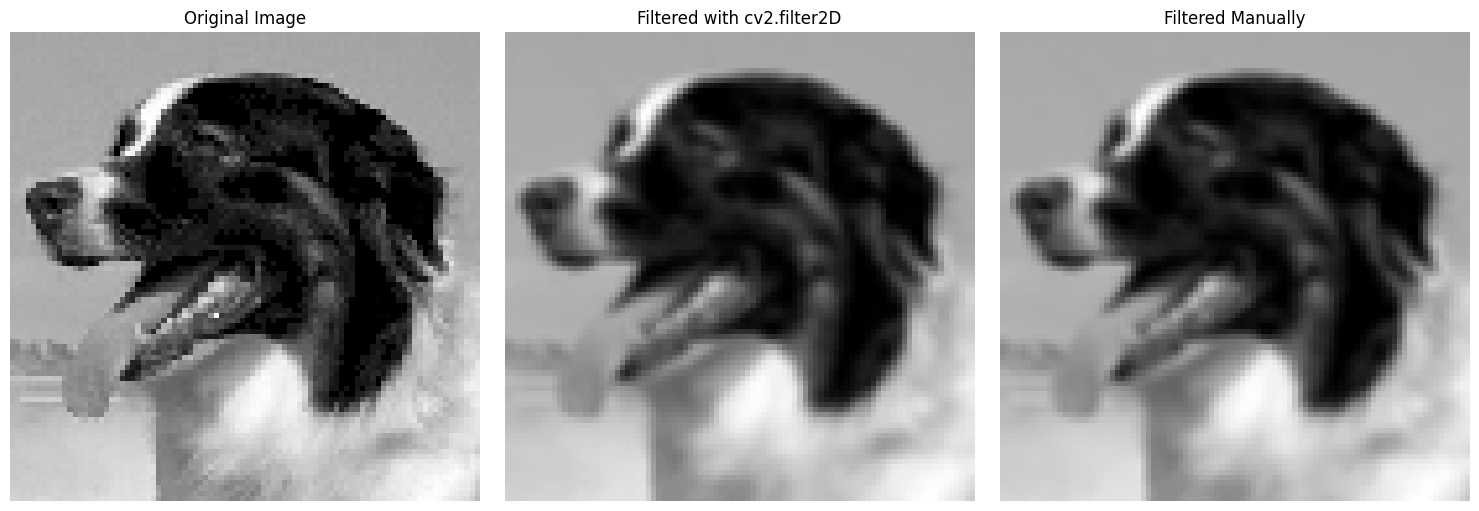

In [20]:
# Step 5: Plot all images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_cv2, cmap='gray')
plt.title("Filtered with cv2.filter2D")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(manual_filtered, cmap='gray')
plt.title("Filtered Manually")
plt.axis('off')

plt.tight_layout()
plt.show()